In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Data - preprocessing

In [6]:
df = pd.read_csv("review_data.csv")

In [7]:
df

,Unnamed: 0,review_date,review_rating,review_title,review_text,verified_purchase
0,0,1/1/2019,5,Dove Mens + Deodorant,"As you get older, you know what you like and w...",True
1,1,1/2/2019,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,True
2,2,1/2/2019,4,Vitamin B12.,Excellent,True
3,3,1/2/2019,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,True
4,4,1/2/2019,5,Very handy,Does what is says it does,False
...,...,...,...,...,...,...
2496,2496,4/27/2019,5,perfect,"These are amazing, just like the original Corn...",False
2497,2497,5/2/2019,5,delicious,Our whole family loves bovril and we use it da...,False
2498,2498,5/5/2019,1,This review is for the squeezy bottle,Contents of this bottle is lovely. HOWEVER try...,False
2499,2499,5/17/2019,4,very nice,These taste great and you cannot Cant tell the...,False


In [12]:
target = df["verified_purchase"]
df["verified_purchase"].astype(int)

0       1
1       1
2       1
3       1
4       0
       ..
2496    0
2497    0
2498    0
2499    0
2500    0
Name: verified_purchase, Length: 2501, dtype: int32

<AxesSubplot:xlabel='verified_purchase', ylabel='count'>

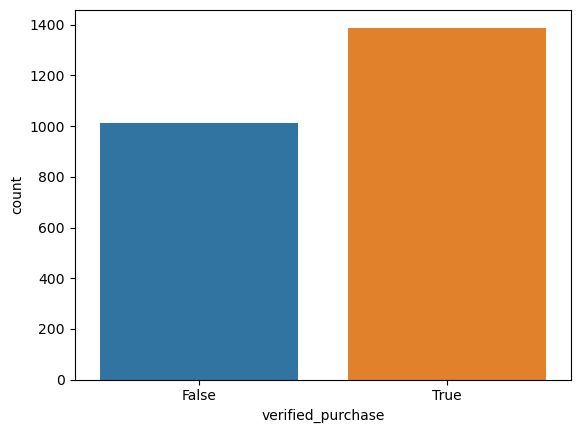

In [21]:
class_bar=sns.countplot(data=df,x="verified_purchase")
ax = plt.gca()
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+500))
class_bar

In [17]:
df.isnull().sum()

Unnamed: 0            0
review_date           0
review_rating         0
review_title         98
review_text           0
verified_purchase     0
dtype: int64

In [19]:
df.dropna(inplace = True)

In [20]:
df

,Unnamed: 0,review_date,review_rating,review_title,review_text,verified_purchase
0,0,1/1/2019,5,Dove Mens + Deodorant,"As you get older, you know what you like and w...",True
1,1,1/2/2019,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,True
2,2,1/2/2019,4,Vitamin B12.,Excellent,True
3,3,1/2/2019,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,True
4,4,1/2/2019,5,Very handy,Does what is says it does,False
...,...,...,...,...,...,...
2496,2496,4/27/2019,5,perfect,"These are amazing, just like the original Corn...",False
2497,2497,5/2/2019,5,delicious,Our whole family loves bovril and we use it da...,False
2498,2498,5/5/2019,1,This review is for the squeezy bottle,Contents of this bottle is lovely. HOWEVER try...,False
2499,2499,5/17/2019,4,very nice,These taste great and you cannot Cant tell the...,False


In [23]:
df['review_rating'].value_counts()

5    1774
4     301
1     145
3     105
2      78
Name: review_rating, dtype: int64

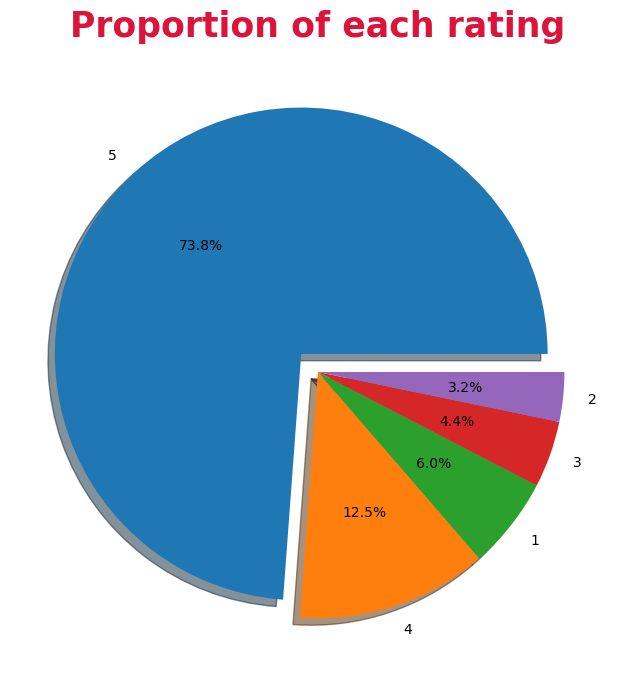

In [24]:
plt.figure(figsize=(15,8))
labels = df['review_rating'].value_counts().keys()
values = df['review_rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

In [25]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [27]:
df['review_text'][0], clean_text(df['review_text'][0])

('As you get older, you know what you like and what is suitable for your body. I like all Dove products. Gives you that fresh all over, wide awake feeling and no dandruff or flakey skin. No smelly a/pits!',
 'get older know like suitable body like Dove products Gives fresh wide awake feeling dandruff flakey skin smelly apits')

In [28]:
df['review_text'][0]

'As you get older, you know what you like and what is suitable for your body. I like all Dove products. Gives you that fresh all over, wide awake feeling and no dandruff or flakey skin. No smelly a/pits!'

In [31]:
df['review_text'].head().apply(clean_text)

0    get older know like suitable body like Dove pr...
1    Three gigantic marmite jars last probably whol...
2                                            Excellent
3                       great flavour top slow cooking
4                                                 says
Name: review_text, dtype: object

In [32]:
df.shape

(2403, 6)

In [33]:
df['review_text'] = df['review_text'].astype(str)

In [37]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [38]:
preprocess(df['review_text'][4])

'Does says'

In [39]:
df['review_text'] = df['review_text'].apply(preprocess)

In [41]:
df['review_text'] = df['review_text'].str.lower()

In [43]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['review_text'] = df['review_text'].apply(lambda x: stem_words(x))

In [48]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["review_text"] = df["review_text"].apply(lambda text: lemmatize_words(text))

In [49]:
df.to_csv('Preprocessed Fake Reviews Detection Dataset.csv')

In [51]:
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,review_date,review_rating,review_title,review_text,verified_purchase
0,0,0,1/1/2019,5,Dove Mens + Deodorant,a get older know like suitabl bodi i like dove...,True
1,1,1,1/2/2019,5,Great for a marmite lover!,three gigant marmit jar last probabl whole lif...,True
2,2,2,1/2/2019,4,Vitamin B12.,excel,True
3,3,3,1/2/2019,5,A Very Handy Flavour Top - Up to Keep In The C...,a great flavour top slow cook,True
4,4,4,1/2/2019,5,Very handy,doe say,False


In [54]:
df.drop(["Unnamed: 0.1"], axis = 1, inplace = True)

In [55]:
df.dropna(inplace=True)

In [56]:
df['length'] = df['review_text'].apply(len)

# Vectorization

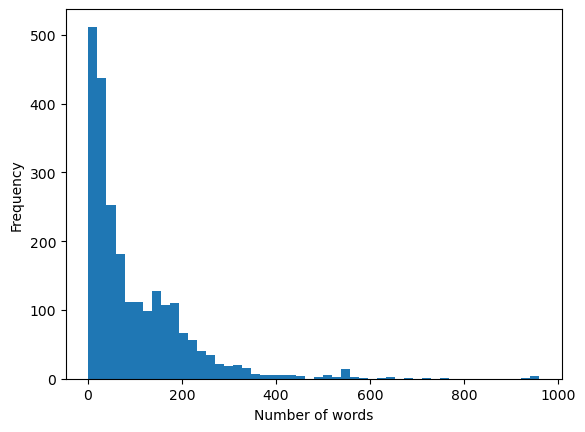

In [57]:
plt.hist(df['length'],bins=50)
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

In [61]:
df[['review_text','length']].sort_values(by='length',ascending=False).head().iloc[0].review_text

"some thing life enjoy buy thing plainli no matter pretti product bright bold actual wash deterg alway grudg purchas no one like dirti smelli cloth wash powder tablet capsul necess make hole everyon 's weekli groceri budget could better spent someth interest cake exot veget look cook along ariel fairi bold persil one big brand domin market deterg it own global consum product giant unilev expert brand market it refresh see capsul reason value. work 15p absolut bargain even dodgi imit one find sub prime supermarket great thing persil guarante product go high qualiti these capsul come rubberi gossam coat case contain differ brightli colour gel like liquid four compart and funki look purpl green white grey swirl gu these thing wash cloth nice pleasant smell without overbear i idea happen plastic case outsid capsul put wash machin mayb bio-de-grad mayb disappear magic one live great mysteri like great sphinx giza bermuda triangl mean voynich manuscript"

In [62]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [58]:
df.groupby('review_title').describe()

Unnamed: 0                            \
                                              count    mean       std     min   
review_title                                                                    
## one of the first ##cream## handwash          1.0  2130.0       NaN  2130.0   
*.*                                             1.0  1092.0       NaN  1092.0   
,                                               5.0   360.0  3.162278   356.0   
10/10?                                          1.0   472.0       NaN   472.0   
2 half empty bottles due to bashed box          1.0  1654.0       NaN  1654.0   
...                                             ...     ...       ...     ...   
you either love it or hate it, I love it        1.0   757.0       NaN   757.0   
yuck                                            1.0    42.0       NaN    42.0   
yummy                                           1.0   949.0       NaN   949.0   
yummy ice cream                                 1.0   561.0       NaN   561.0   
yummy!                                          1.0   907.0       NaN   907.0   

                                                                          \
                                             25%     50%     75%     max   
review_title                                                               
## one of the first ##cream## handwash    2130.0  2130.0  2130.0  2130.0   
*.*                                       1092.0  1092.0  1092.0  1092.0   
,                                          358.0   360.0   362.0   364.0   
10/10?                                     472.0   472.0   472.0   472.0   
2 half empty bottles due to bashed box    1654.0  1654.0  1654.0  1654.0   
...                                          ...     ...     ...     ...   
you either love it or hate it, I love it   757.0   757.0   757.0   757.0   
yuck                                        42.0    42.0    42.0    42.0   
yummy                                      949.0   949.0   949.0   949.0   
yummy ice cream                            561.0   561.0   561.0   561.0   
yummy!                                     907.0   907.0   907.0   907.0   

                                         review_rating       ...            \
                                                 count mean  ...  75%  max   
review_title                                                 ...             
## one of the first ##cream## handwash             1.0  5.0  ...  5.0  5.0   
*.*                                                1.0  5.0  ...  5.0  5.0   
,                                                  5.0  4.0  ...  4.0  4.0   
10/10?                                             1.0  5.0  ...  5.0  5.0   
2 half empty bottles due to bashed box             1.0  3.0  ...  3.0  3.0   
...                                                ...  ...  ...  ...  ...   
you either love it or hate it, I love it           1.0  5.0  ...  5.0  5.0   
yuck                                               1.0  1.0  ...  1.0  1.0   
yummy                                              1.0  4.0  ...  4.0  4.0   
yummy ice cream                                    1.0  5.0  ...  5.0  5.0   
yummy!                                             1.0  4.0  ...  4.0  4.0   

                                         length                            \
                                          count   mean  std    min    25%   
review_title                                                                
## one of the first ##cream## handwash      1.0  161.0  NaN  161.0  161.0   
*.*                                         1.0   16.0  NaN   16.0   16.0   
,                                           5.0   34.0  0.0   34.0   34.0   
10/10?                                      1.0    7.0  NaN    7.0    7.0   
2 half empty bottles due to bashed box      1.0   29.0  NaN   29.0   29.0   
...                                         ...    ...  ...    ...    ...   
you either love it or hate it, I love it    1.0   24.0 

In [63]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x0000026662BC6DC0>)

In [65]:
bow_transformer.fit(df['review_text'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 2808


In [67]:
review4 = df['review_text'][3]
review4

'a great flavour top slow cook'

In [68]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 557)	1
  (0, 969)	1
  (0, 1110)	1
  (0, 2185)	1
  (0, 2519)	1
(1, 2808)


In [73]:
print(bow_transformer.get_feature_names()[62])
print(bow_transformer.get_feature_names()[68])

abov
accept


In [74]:
bow_reviews = bow_transformer.transform(df['review_text'])

In [75]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (2399, 2808)
Amount of non zero values in the bag of words model: 34465


In [76]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.51


In [77]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 557)	1
  (0, 969)	1
  (0, 1110)	1
  (0, 2185)	1
  (0, 2519)	1


In [83]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['smell']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['product']])

2.499089855265235
2.502828177375842


In [82]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (2399, 2808)
No. of Dimensions: 2


# Training the data

In [88]:
review_train, review_test, label_train, label_test = train_test_split(df['review_text'],df['verified_purchase'],test_size=0.25)

In [89]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [90]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000026662BC6DC0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

predictions = pipeline.predict(review_test)
label_test, predictions

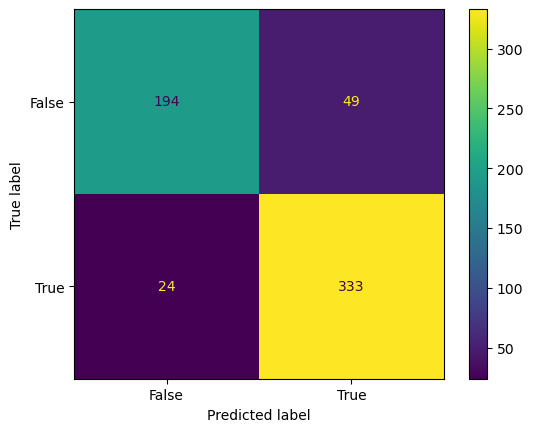

Accuracy Score: 0.8783333333333333
Classification Report:               precision    recall  f1-score   support

       False       0.89      0.80      0.84       243
        True       0.87      0.93      0.90       357

    accuracy                           0.88       600
   macro avg       0.88      0.87      0.87       600
weighted avg       0.88      0.88      0.88       600



In [96]:
cm = confusion_matrix(label_test,predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()
print('Accuracy Score:',accuracy_score(label_test,predictions))
print('Classification Report:',classification_report(label_test,predictions))

No Skill: ROC AUC=0.500
NN: ROC AUC=0.866


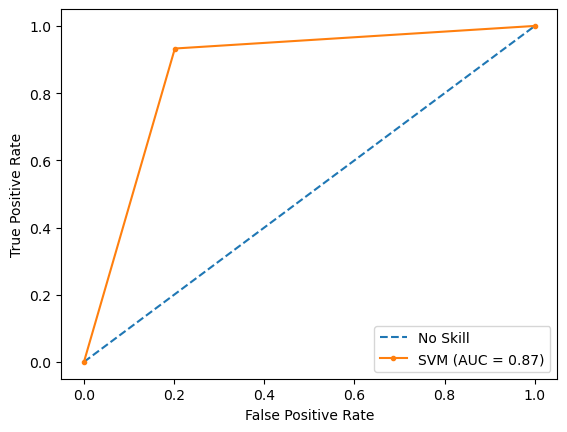

In [101]:
ns_probs = [0 for _ in range(len(label_test))]
probs = pipeline.predict(review_test)
# keep probabilities for the positive outcome only
#probs = probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(label_test, ns_probs)
model_auc = roc_auc_score(label_test, probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('NN: ROC AUC=%.3f' % (model_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(label_test, ns_probs)
fpr, tpr, _ = roc_curve(label_test, probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='SVM (AUC = %0.2f)' % model_auc)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()